## Section 1 : Team and project meta information

### Project Title: Home Credit Default Risk
### Group Number: 36

### Team Members

Yashvanth Guntupalli (yakguntu@iu.edu)

Srilekha Malraju (msrilekh@iu.edu)

Revanth Sai Chowdary Rayala (rerayala@iu.edu)

Vinay Chandra Makineni (vimakin@iu.edu)

### Team photos




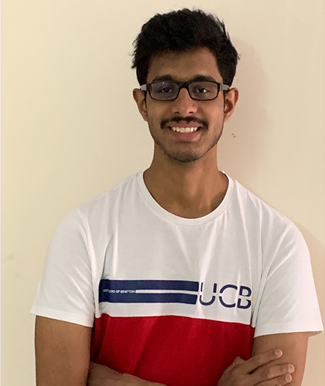

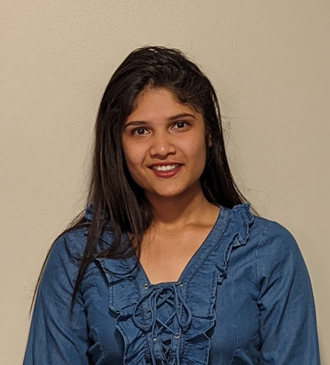

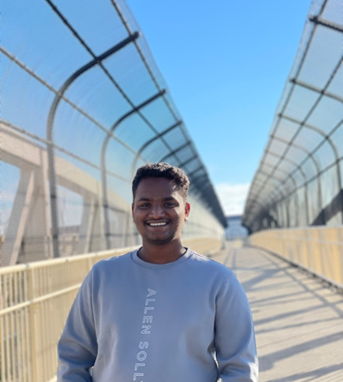

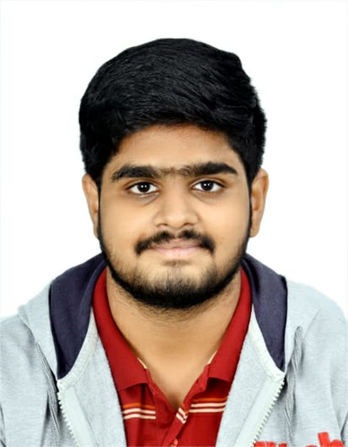

## Section 2 : Abstract

Many people struggle to get loans due to insufficient or non-existent credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders. Home credit strives to broaden financial intrusion for the unbanked population by providing a positive and safe borrowing experience.  In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. There are multiple  datasets that will be taken from Kaggle that are mentioned in the below section. We perform exploratory data analysis and feature engineering on the given datasets and train the data using multiple classification algorithms. Based on some specific metrics, we decide which model is the best among all. The output of the model will be either 0 or 1 where 0 corresponds to saying that the customer will repay the loan and 1 meaning that there’s some risk to the customer repaying to the lender.
In phase 2, we performed feature engineering, hyperparameter tuning, and modeling pipelines. We experimeted the features with Logistic Regression, Decision Trees, Random Forest, XGBoost, SVM, and Lasso Regression.
We observed that Logistic Regression and Decision Trees have the highest accuracy with 92%, followed by XGBoost with 64%, with Decision Trees and Lasso Regression performing extremely poor.


## Section 3 : Data Description and Task Description

### Section 3.1 : Dataset 

Application_train/application_test: This dataset contains information about each loan application at Home Credit. Each loan is depicted by a row and is identified by the feature SK_ID_CURR. The training application comes with target indicating 0 which means the loan was repaid and 1 the loan was not repaid.  

Bureau: Data concerning client’s previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan can have multiple previous credits. 

Bureau_balance: Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length 

Previous_Application: Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV. 

POS_CASH_BALANCE: Monthly data about previous point of sale or cash loans client have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows. 

Credit_Card_Balance: Monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows. 
Installments_payment: Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

Installments_payment: Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 



### Section 3.2 Tasks to be tackled

We have to perform Feature Engineering and Hyper parameter tuning using GridsearchCV. We will test models on logistic regression,Lasso, random forest, decision trees, xgboost and Support Vector machines. Our aim is to improve the accuracy of the model. We will then compare the results of multiple models and report which one provides the best accuracy.

### Section 3.3 : Understanding the workflow : 

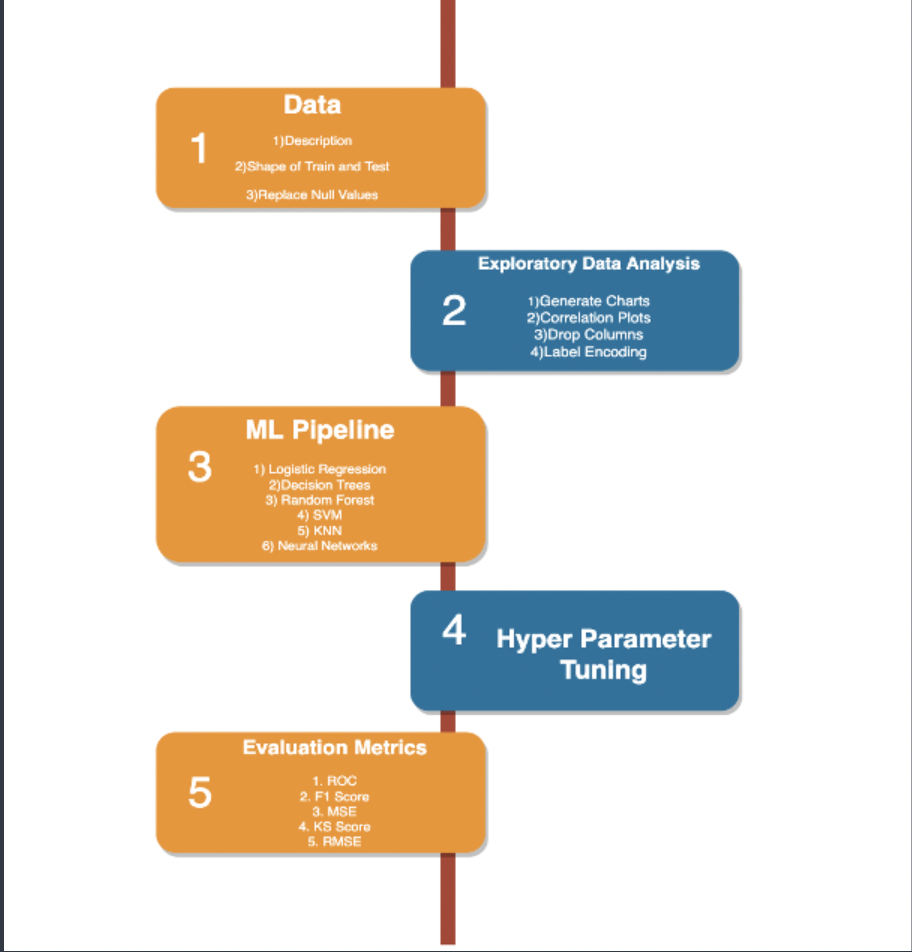

In [1]:
# Read data from application_train dataset.
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
application_train = pd.read_csv('C:/Users/makin/Downloads/application_train.csv')
application_test = pd.read_csv('C:/Users/makin/Downloads/application_test.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
y = application_train['TARGET']
X = application_train.drop(['SK_ID_CURR','TARGET'], axis = 1)

In [3]:
application_train
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
application_train = pd.read_csv('C:/Users/makin/Downloads/application_train.csv')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

numerical_columns = []
categorical_columns = []
X =  application_train.drop(columns = 'TARGET')
y = application_train['TARGET']
for x in X:
    if(X[x].dtype == np.float64 or X[x].dtype == np.int64):
        numerical_columns.append(X[x])
    else:
        categorical_columns.append(X[x])

# In the above snippet,We take two lists and add the categorical attributes into the categorical lists and numerical attributes in the numerical lists
numerical_pl =Pipeline([('scaler', StandardScaler()),
('imputer', SimpleImputer(strategy = 'mean'))])
categorical_pl = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent'))
])
combined_pipeline = FeatureUnion(transformer_list=[ ("numerical_pl", numerical_pl), ("categorical_pl", categorical_pl),
])
np.random.seed(42) 
combined_pl_with_pred = Pipeline([
            ("preparation", numerical_pl),
("linear", LogisticRegression(random_state=42))])

# We then take two pipelines, One for numerical and one for categorical. And combine them using FeatureUnion
def EncodingDataset(application_train):
    categorical_columns = list(application_train.select_dtypes(include=['category','object']))
    enc = LabelEncoder()

    for column in categorical_columns:
        try:
            application_train[column] = application_train[column].fillna("NULL")
            application_train[column] = enc.fit_transform(application_train[column])
        except:
            print('Cannot convert :',column)
    return application_train
#Since, there are categorical attributes, we encode the dataset using LabelEncoding
application_train = EncodingDataset(application_train)
application_test = EncodingDataset(application_test)
#The following code is to train the model and predict the accuracy.
X =  application_train.drop(columns = 'TARGET')
y = application_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(X_test.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())
combined_pl_with_pred.fit(X_train, y_train)
preds_test = combined_pl_with_pred.predict(X_test)
preds_train = combined_pl_with_pred.predict(X_train)
train_score = combined_pl_with_pred.score(X_train, y_train)
test_score  = combined_pl_with_pred.score(X_test, y_test)

AUC = roc_auc_score(y_test,combined_pl_with_pred.predict(X_test))

ConfusionMatrix = confusion_matrix(y_test, combined_pl_with_pred.predict(X_test))
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)
print(accuracy_score(y_test, preds_test), ": is the accuracy score")
print("The training score is: ",train_score)
print("The testing score is: ",test_score)
print("The Area Under the Curve: ",AUC)
print("The Confusion Matrix is: ",ConfusionMatrix)


train size X :  (246008, 121)
train size y :  (246008,)
test size X :  (61503, 121)
test size y :  (61503,)
0.91910963692828 : is the accuracy score
The training score is:  0.9190310884198888
The testing score is:  0.91910963692828
The Area Under the Curve:  0.5039186543640561
The Confusion Matrix is:  [[56483    71]
 [ 4904    45]]


## Section 4: Feature Engineering

### Section 4.1 : Removing features will Null Values with more than 50%

In [4]:
null_data = X.isna().sum().reset_index().rename(columns={'index':'col_name',0:'null_count'})
null_data['count_%'] = null_data['null_count']/len(X)*100
null_data = null_data[null_data['count_%'] <= 50]
null_data
selected_columns = null_data['col_name'].tolist() + ['TARGET']
print(selected_columns)
null_data['col_type'] = null_data['col_name'].apply(lambda x: X[x].dtype)
null_data[null_data['count_%'] > 0]

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'FO

,col_name,null_count,count_%,col_type
8,AMT_ANNUITY,12,0.003902,float64
9,AMT_GOODS_PRICE,278,0.090403,float64
28,CNT_FAM_MEMBERS,2,0.000650,float64
41,EXT_SOURCE_2,660,0.214626,float64
42,EXT_SOURCE_3,60965,19.825307,float64
45,YEARS_BEGINEXPLUATATION_AVG,150007,48.781019,float64
50,FLOORSMAX_AVG,153020,49.760822,float64
59,YEARS_BEGINEXPLUATATION_MODE,150007,48.781019,float64
64,FLOORSMAX_MODE,153020,49.760822,float64
73,YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019,float64


We have removed all the columns who are having null values more than 50%. The above table displays the rows which have less than 50% null values which means they are being taken into consideration

### Section 4.2 : Replacing EXT_SOURCE_3 Null Values with Mean Value

In [5]:
X_feature = application_train[selected_columns]
mean_value = X_feature['EXT_SOURCE_3'].mean()
temp_col_reqd = null_data[null_data['null_count'] != 0].reset_index(drop=True)['col_name'].tolist()
for col in temp_col_reqd:
    if 'EXT_SOURCE_3' in col:
        print("columns to be filled with mean is: {}".format(col))
        X_feature[col].fillna(mean_value,inplace=True)

columns to be filled with mean is: EXT_SOURCE_3


We are replacing the EXT_SOURCE_3 with their mean value as it's important these values shouldn't remain empty

### Section 4.3 : Replacing AMT_GOODS_PRICE Null Values with Median Value



In [6]:
for col in temp_col_reqd:
    if 'AMT_GOODS_PRICE' in col:
        print("columns to be filled with median is: {}".format(col))
        X_feature[col].fillna(X_feature[col].median(),inplace=True) 

columns to be filled with median is: AMT_GOODS_PRICE


We replaces AMT_GOODS_PRICE null values with median as it didn't make sense to leave AMT_GOODS_PRICE with Null Values

### Section 4.4 : Replacing AMT_ANNUITY Values with 0

In [7]:

mean_value = application_train['AMT_ANNUITY'].mean()
temp_col_reqd = null_data[null_data['null_count'] != 0].reset_index(drop=True)['col_name'].tolist()
for col in temp_col_reqd:
    if 'AMT_ANNUITY' in col:
        print("columns to be filled with 0 is: {}".format(col))
        X_feature[col].fillna(0,inplace=True)

columns to be filled with 0 is: AMT_ANNUITY


### Section 4.5 : Annuity to Salary Ratio

We added some new features to the dataset which we found to be meaningful which are as follows:
1) Annuity to Salary Ratio
2) Credit to Goods Ratio
3) Goods to Income Ratio
4) Credit to Income Ratio
5) Employed to Birth Ratio
6) Multiplication of EXT_SOURCE
7) New phone to birth ratio
8) Income Per Person
9) Annuity to Credit Ratio

In [45]:
X_feature['Annuity_to_salary_ratio'] = X_feature['AMT_ANNUITY']/X_feature['AMT_INCOME_TOTAL']

In [9]:
X_feature['Annuity_to_salary_ratio']

0         0.121978
1         0.132217
2         0.100000
3         0.219900
4         0.179963
            ...   
307506    0.174971
307507    0.166687
307508    0.195941
307509    0.118158
307510    0.311857
Name: Annuity_to_salary_ratio, Length: 307511, dtype: float64

### Section 4.6 : New Credit to Goods Ratio

In [10]:
X_feature['NEW_CREDIT_TO_GOODS_RATIO'] = X_feature['AMT_CREDIT'] / X_feature['AMT_GOODS_PRICE']

In [11]:
X_feature['NEW_CREDIT_TO_GOODS_RATIO']

0         1.158397
1         1.145199
2         1.000000
3         1.052803
4         1.000000
            ...   
307506    1.132000
307507    1.198000
307508    1.158400
307509    1.158394
307510    1.000000
Name: NEW_CREDIT_TO_GOODS_RATIO, Length: 307511, dtype: float64

### Section 4.7 : Goods Income

In [12]:
X_feature['GOODS_INCOME'] =  X_feature['AMT_GOODS_PRICE']/X_feature['AMT_INCOME_TOTAL']
X_feature['GOODS_INCOME']

0         1.733333
1         4.183333
2         2.000000
3         2.200000
4         4.222222
            ...   
307506    1.428571
307507    3.125000
307508    3.823529
307509    1.868421
307510    4.285714
Name: GOODS_INCOME, Length: 307511, dtype: float64

### Section 4.8 : Credit/Income Ratio

In [13]:
# This gives us the Credit/Income column
X_feature['Credit_Income'] = X_feature['AMT_CREDIT']/X_feature['AMT_INCOME_TOTAL']
X_feature['Credit_Income']

0         2.007889
1         4.790750
2         2.000000
3         2.316167
4         4.222222
            ...   
307506    1.617143
307507    3.743750
307508    4.429176
307509    2.164368
307510    4.285714
Name: Credit_Income, Length: 307511, dtype: float64

### Section 4.9 : Employed to Birth Ratio

In [14]:
# This gives us Days employed percentage
X_feature['Employed_Birth'] = X_feature['DAYS_EMPLOYED']/X_feature['DAYS_BIRTH']

In [15]:
X_feature['Employed_Birth']

0          0.067329
1          0.070862
2          0.011814
3          0.159905
4          0.152418
            ...    
307506     0.025303
307507   -17.580890
307508     0.529266
307509     0.400134
307510     0.074869
Name: Employed_Birth, Length: 307511, dtype: float64

### Section 4.10 : Multiplication of EXT_SOURCE

In [16]:
# This gives us the new sources product, we're only considering EXT_SOURCE_2 and EXT_SOURCE_3 because EXT_SOURCE_1 got removed when 

X_feature['NEW_SOURCES_PROD'] =  X_feature['EXT_SOURCE_2'] * X_feature['EXT_SOURCE_3']
X_feature

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,Annuity_to_salary_ratio,NEW_CREDIT_TO_GOODS_RATIO,GOODS_INCOME,Credit_Income,Employed_Birth,NEW_SOURCES_PROD
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,1.0,1,0.121978,1.158397,1.733333,2.007889,0.067329,0.036649
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0,0.132217,1.145199,4.183333,4.790750,0.070862,0.317876
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0,0.100000,1.000000,2.000000,2.000000,0.011814,0.405575
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,0,0.219900,1.052803,2.200000,2.316167,0.159905,0.332280
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0,0.179963,1.000000,4.222222,4.222222,0.152418,0.164872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,0,0.174971,1.132000,1.428571,1.617143,0.025303,0.348214
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,0,0.166687,1.198000,3.125000,3.743750,-17.580890,0.059255
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,1.0,0.0,1.0,0,0.195941,1.158400,3.823529,4.429176,0.529266,0.117248
307509,456254,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0.0,0.0,0.0,1,0.118158,1.158394,1.868421,2.164368,0.400134,0.339874


### Section 4.11 : New phone to birth ratio

In [17]:
X_feature['NEW_PHONE_TO_BIRTH_RATIO'] = X_feature['DAYS_LAST_PHONE_CHANGE'] / X_feature['DAYS_EMPLOYED']
X_feature['NEW_PHONE_TO_BIRTH_RATIO']

0         1.780220
1         0.696970
2         3.622222
3         0.203027
4         0.364055
            ...   
307506    1.156780
307507    0.000000
307508    0.241005
307509    0.067280
307510    0.623613
Name: NEW_PHONE_TO_BIRTH_RATIO, Length: 307511, dtype: float64

### Section 4.12 : Income Per Person

In [18]:
X_feature['INCOME_PER_PERSON'] = X_feature['AMT_INCOME_TOTAL'] / X_feature['CNT_FAM_MEMBERS']
X_feature['INCOME_PER_PERSON']

0         202500.0
1         135000.0
2          67500.0
3          67500.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509     85500.0
307510     78750.0
Name: INCOME_PER_PERSON, Length: 307511, dtype: float64

### Section 4.13 : Annuity to Credit Ratio

In [19]:
X_feature['PAYMENT_RATE'] = X_feature['AMT_ANNUITY'] / X_feature['AMT_CREDIT']
X_feature['PAYMENT_RATE']

0         0.060749
1         0.027598
2         0.050000
3         0.094941
4         0.042623
            ...   
307506    0.108198
307507    0.044524
307508    0.044239
307509    0.054592
307510    0.072767
Name: PAYMENT_RATE, Length: 307511, dtype: float64

In [20]:
final_train = X_feature

In [21]:
final_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,TARGET,Annuity_to_salary_ratio,NEW_CREDIT_TO_GOODS_RATIO,GOODS_INCOME,Credit_Income,Employed_Birth,NEW_SOURCES_PROD,NEW_PHONE_TO_BIRTH_RATIO,INCOME_PER_PERSON,PAYMENT_RATE
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0.121978,1.158397,1.733333,2.007889,0.067329,0.036649,1.780220,202500.0,0.060749
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.132217,1.145199,4.183333,4.790750,0.070862,0.317876,0.696970,135000.0,0.027598
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0.100000,1.000000,2.000000,2.000000,0.011814,0.405575,3.622222,67500.0,0.050000
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0.219900,1.052803,2.200000,2.316167,0.159905,0.332280,0.203027,67500.0,0.094941
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0.179963,1.000000,4.222222,4.222222,0.152418,0.164872,0.364055,121500.0,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0,0.174971,1.132000,1.428571,1.617143,0.025303,0.348214,1.156780,157500.0,0.108198
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0,0.166687,1.198000,3.125000,3.743750,-17.580890,0.059255,0.000000,72000.0,0.044524
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,0,0.195941,1.158400,3.823529,4.429176,0.529266,0.117248,0.241005,153000.0,0.044239
307509,456254,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,1,0.118158,1.158394,1.868421,2.164368,0.400134,0.339874,0.067280,85500.0,0.054592


### Section 4.14 : Removing Correlated Values

In [22]:
limit = 0.9

correlation_matrix = final_train.corr().abs()

In [23]:
correlation_matrix

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,TARGET,Annuity_to_salary_ratio,NEW_CREDIT_TO_GOODS_RATIO,GOODS_INCOME,Credit_Income,Employed_Birth,NEW_SOURCES_PROD,NEW_PHONE_TO_BIRTH_RATIO,INCOME_PER_PERSON,PAYMENT_RATE
SK_ID_CURR,1.000000,0.001654,0.000769,0.001216,0.000703,0.001129,0.001820,0.000343,0.000407,0.000258,...,0.002108,0.002325,0.001731,0.001535,0.001726,0.001584,0.001663,0.001042,0.000199,0.000351
NAME_CONTRACT_TYPE,0.001654,1.000000,0.008613,0.004022,0.067177,0.029998,0.003531,0.221648,0.241503,0.185711,...,0.030896,0.251171,0.328122,0.182741,0.218026,0.051511,0.007883,0.000223,0.001571,0.052272
CODE_GENDER,0.000769,0.008613,1.000000,0.345833,0.044340,0.047403,0.074728,0.021572,0.076956,0.022495,...,0.054692,0.118069,0.002013,0.124951,0.125683,0.150482,0.022181,0.023231,0.052238,0.071893
FLAG_OWN_CAR,0.001216,0.004022,0.345833,1.000000,0.002817,0.102023,0.083383,0.116225,0.141590,0.120435,...,0.021851,0.062256,0.033435,0.035878,0.041364,0.149666,0.027951,0.018503,0.039657,0.005227
FLAG_OWN_REALTY,0.000703,0.067177,0.044340,0.002817,1.000000,0.002366,0.002934,0.039270,0.005154,0.045571,...,0.006148,0.020081,0.028790,0.055062,0.048835,0.068113,0.023489,0.013998,0.001595,0.047346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Employed_Birth,0.001584,0.051511,0.150482,0.149666,0.068113,0.231710,0.061637,0.059482,0.098194,0.057650,...,0.042206,0.081916,0.006152,0.081619,0.081326,1.000000,0.041839,0.090107,0.014280,0.024651
NEW_SOURCES_PROD,0.001663,0.007883,0.022181,0.027951,0.023489,0.036851,0.024579,0.114800,0.105129,0.122873,...,0.194415,0.032744,0.059851,0.063694,0.053789,0.041839,1.000000,0.013362,0.030077,0.030186
NEW_PHONE_TO_BIRTH_RATIO,0.001042,0.000223,0.023231,0.018503,0.013998,0.028012,0.002748,0.003688,0.007606,0.003228,...,0.004562,0.002336,0.001181,0.003386,0.003208,0.090107,0.013362,1.000000,0.004038,0.001454
INCOME_PER_PERSON,0.000199,0.001571,0.052238,0.039657,0.001595,0.231734,0.861814,0.162090,0.205097,0.165659,...,0.006571,0.219483,0.023267,0.158923,0.163293,0.014280,0.030077,0.004038,1.000000,0.024287


In [24]:
up_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
up_triangle.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,TARGET,Annuity_to_salary_ratio,NEW_CREDIT_TO_GOODS_RATIO,GOODS_INCOME,Credit_Income,Employed_Birth,NEW_SOURCES_PROD,NEW_PHONE_TO_BIRTH_RATIO,INCOME_PER_PERSON,PAYMENT_RATE
SK_ID_CURR,NaN,0.001654,0.000769,0.001216,0.000703,0.001129,0.001820,0.000343,0.000407,0.000258,...,0.002108,0.002325,0.001731,0.001535,0.001726,0.001584,0.001663,0.001042,0.000199,0.000351
NAME_CONTRACT_TYPE,NaN,NaN,0.008613,0.004022,0.067177,0.029998,0.003531,0.221648,0.241503,0.185711,...,0.030896,0.251171,0.328122,0.182741,0.218026,0.051511,0.007883,0.000223,0.001571,0.052272
CODE_GENDER,NaN,NaN,NaN,0.345833,0.044340,0.047403,0.074728,0.021572,0.076956,0.022495,...,0.054692,0.118069,0.002013,0.124951,0.125683,0.150482,0.022181,0.023231,0.052238,0.071893
FLAG_OWN_CAR,NaN,NaN,NaN,NaN,0.002817,0.102023,0.083383,0.116225,0.141590,0.120435,...,0.021851,0.062256,0.033435,0.035878,0.041364,0.149666,0.027951,0.018503,0.039657,0.005227
FLAG_OWN_REALTY,NaN,NaN,NaN,NaN,NaN,0.002366,0.002934,0.039270,0.005154,0.045571,...,0.006148,0.020081,0.028790,0.055062,0.048835,0.068113,0.023489,0.013998,0.001595,0.047346


In [25]:
to_drop = [column for column in up_triangle.columns if any(up_triangle[column] > limit)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 11 columns to remove.


In [26]:
final_train = final_train.drop(columns = to_drop)

In [27]:
final_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,Annuity_to_salary_ratio,NEW_CREDIT_TO_GOODS_RATIO,GOODS_INCOME,NEW_SOURCES_PROD,NEW_PHONE_TO_BIRTH_RATIO,INCOME_PER_PERSON,PAYMENT_RATE
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,7,...,0.0,1.0,1,0.121978,1.158397,1.733333,0.036649,1.780220,202500.0,0.060749
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,...,0.0,0.0,0,0.132217,1.145199,4.183333,0.317876,0.696970,135000.0,0.027598
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,7,...,0.0,0.0,0,0.100000,1.000000,2.000000,0.405575,3.622222,67500.0,0.050000
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,7,...,NaN,NaN,0,0.219900,1.052803,2.200000,0.332280,0.203027,67500.0,0.094941
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,7,...,0.0,0.0,0,0.179963,1.000000,4.222222,0.164872,0.364055,121500.0,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,157500.0,254700.0,27558.0,7,...,NaN,NaN,0,0.174971,1.132000,1.428571,0.348214,1.156780,157500.0,0.108198
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,7,...,NaN,NaN,0,0.166687,1.198000,3.125000,0.059255,0.000000,72000.0,0.044524
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,7,...,0.0,1.0,0,0.195941,1.158400,3.823529,0.117248,0.241005,153000.0,0.044239
307509,456254,0,0,0,1,0,171000.0,370107.0,20205.0,7,...,0.0,0.0,1,0.118158,1.158394,1.868421,0.339874,0.067280,85500.0,0.054592


In [28]:
final_train.shape

(307511, 82)

In [29]:
features = final_train.columns.tolist()
features.remove('TARGET')
len(features)

81

We took the features which are highly correlated and since they're highly correlated, including all of them is not necessary since they won't make any difference while, hence we're removing them. We took a correlation limit of 0.9 and removed all the features which have a correlation higher than 0.9. There're 11 such columns

In [30]:
X1 = final_train[features]
y1 = final_train['TARGET']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=42) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Why we chose this approach:
1) Ratios such a income per person and credit to income would be a good measure to judge an individual's credibility and repayment ability. So, it made sense to add the new features.

2) Not all null features would make sense filling it with most_frequent, few features are better off by replacing their values with 0,mean or median.

## Section 5: Hyperparameter Tuning(GridSearchCV)

Post Feature Engineering, We plan to tune our model to find the optimal parameters. We use GridSeachCV for achieving this. We implement multiple models such as Logistic Regression, Decision Trees,Random Forest, SVM, Lasso Regression, XGBoost. 

### Section 5.1 : Logistic Regression

In [32]:
from time import time

from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
param_grid = {
    'classifier__C': [0.1,1,10,100]
}
int_x= X1.select_dtypes(include='int64')
float_x = X1.select_dtypes(include='float32')
num_categorial = list(pd.concat([int_x,float_x], axis=1))
cat_categorial = list(X1.select_dtypes(include='object'))
numrical_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('imputer', SimpleImputer(strategy = 'median')) 
])
categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])
final_pipeline = ColumnTransformer([
    ("num_pipeline", numrical_pipeline, num_categorial),
    ("cat_pipeline", categorical_pipeline, cat_categorial)], remainder = 'drop')
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

model = Pipeline(steps = [('data_pipeline_merge',final_pipeline),
                         ('classifier', LogisticRegression(solver='lbfgs',penalty='l2'))])
print("1st line")
grids = GridSearchCV(model, param_grid, cv=5, n_jobs = -1, verbose = 2, refit = True)
print("2nd line")

grids.fit(X_train, y_train)

print("3rd line")
start = time()

trainAcc  = grids.score(X_train, y_train)
validAcc  = grids.score(X_valid, y_valid)
train_time = np.round(time() - start, 4)
print("4th line")
start = time()

testAcc  = grids.score(X_test, y_test)
test_time = np.round(time() - start, 4)
AUC= roc_auc_score(y_test, grids.predict(X_test))
try: experimentLog
except : experimentLog = pd.DataFrame(columns=["ExpID", "Accuracy", "Test Accuracy", "Validation Accuracy",
                                               "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
experimentLog.loc[len(experimentLog)] =[f"Logistic Regression GridSearch",
                                        f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC,
                                        train_time, test_time,
                                        "Logistic Regression GridSearch"]

1st line
2nd line
Fitting 5 folds for each of 4 candidates, totalling 20 fits
3rd line
4th line


In [33]:
experimentLog

,ExpID,Accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Experiment description
0,Logistic Regression GridSearch,92.00%,91.94%,91.64%,0.5,0.176,0.039,Logistic Regression GridSearch


We implemented Logistic Regression with Hyperparameter Tuning in the above cell, as we can see, We got an accuracy of 92% which is an improvement from Phase - 1 where we got an accuracy of 91.9%. The AUC score didn't improve too much. The improvement in the accuracy isn't very considerable, but it's still an improvement

### Section 5.2 : Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
param_grid = [{
    'regressor__max_depth': [2, 3],
    'regressor__min_samples_split': [2, 3],
}]
DecisionTreeModel = Pipeline(steps = [('data_pipeline_merge',final_pipeline),
                          ('regressor', DecisionTreeRegressor(random_state=100))])
print("1st line")
grids = GridSearchCV(DecisionTreeModel, param_grid, cv=2)
print("2nd line")

grids.fit(X_train, y_train)

print("3rd line")
start = time()

trainAcc  = grids.score(X_train, y_train)
validAcc  = grids.score(X_valid, y_valid)
train_time = np.round(time() - start, 4)
print("4th line")
start = time()

testAcc  = grids.score(X_test, y_test)
test_time = np.round(time() - start, 4)
AUC= roc_auc_score(y_test, grids.predict(X_test))
if not experimentLog.empty:
    del experimentLog
try: experimentLog
except : experimentLog = pd.DataFrame(columns=["ExpID", "Accuracy", "Test Accuracy", "Validation Accuracy",
                                               "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
experimentLog.loc[len(experimentLog)] =[f"Decision Tree GridSearch",
                                        f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC,
                                        train_time, test_time,
                                        "Decision Tree GridSearch"]


1st line
2nd line
3rd line
4th line


In [35]:
experimentLog

,ExpID,Accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Experiment description
0,Decision Tree GridSearch,1.06%,1.04%,1.21%,0.598608,0.186,0.035,Decision Tree GridSearch


We implemented Decision Trees with Hyperparameter Tuning in the above cell, as we can see, We got a very poor accuracy but a decent AUC score of 0.6. Hence, we can conclude that Decision Trees doesn't work well with the dataset.

### Section 5.3: Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

param_grid = [{'classifier__max_depth': [3, 5, 10],
               'classifier__min_samples_split': [2, 5, 10]}]
RandomForestModel = Pipeline(steps = [('data_pipeline_merge',final_pipeline),
                          ('classifier', RandomForestClassifier(random_state=100))])
print("1st line")
grids = GridSearchCV(RandomForestModel, param_grid, cv=2)
print("2nd line")

grids.fit(X_train, y_train)

print("3rd line")
start = time()

trainAcc  = grids.score(X_train, y_train)
validAcc  = grids.score(X_valid, y_valid)
train_time = np.round(time() - start, 4)
print("4th line")
start = time()

testAcc  = grids.score(X_test, y_test)
test_time = np.round(time() - start, 4)
AUC= roc_auc_score(y_test, grids.predict(X_test))
if not experimentLog.empty:
    del experimentLog
try: experimentLog
except : experimentLog = pd.DataFrame(columns=["ExpID", "Accuracy", "Test Accuracy", "Validation Accuracy",
                                               "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
experimentLog.loc[len(experimentLog)] =[f"Random Forest GridSearch",
                                        f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC,
                                        train_time, test_time,
                                        "Random Forest GridSearch"]

1st line
2nd line
3rd line
4th line


In [37]:
experimentLog

,ExpID,Accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Experiment description
0,Random Forest GridSearch,92.00%,91.94%,91.64%,0.5,1.139,0.176,Random Forest GridSearch


We implemented Random Forest with GridSearchCV in the above cell, as we can see, We got an accuracy of 92%. The AUC score didn't improve too much for Random Forest as well.

### Section 5.4 : XGBoost

In [38]:
import xgboost as xgb
xgboost_pipe = Pipeline(steps = [
    ('data_pipeline_merge',final_pipeline),
    ('standard_scaler', StandardScaler()),
    ('model', xgb.XGBClassifier())
])

param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500]
}

xgboost_search = GridSearchCV(xgboost_pipe, param_grid, scoring="roc_auc",cv=5)

start = time()
xgboost_search.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = xgboost_search.score(X_train, y_train)
validAcc  = xgboost_search.score(X_valid, y_valid)
start = time()
testAcc  = xgboost_search.score(X_test, y_test)
test_time = np.round(time() - start, 4)

number_of_inputs = X_train.shape[1]
AUC = roc_auc_score(y_test,xgboost_search.predict(X_test))

try: experimentLog
except : experimentLog = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "Validation Accuracy",
                                               "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
experimentLog.loc[len(experimentLog)] =[f"Gridsearch Xgboost with {number_of_inputs} inputs",
                                        f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC,
                                        train_time, test_time,
                                        "Xgboost GridSearch with selected features"]

In [39]:
experimentLog

,ExpID,Accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Experiment description
0,Random Forest GridSearch,92.00%,91.94%,91.64%,0.5,1.1390,0.176,Random Forest GridSearch
1,Gridsearch Xgboost with 81 inputs,64.98%,64.64%,65.04%,0.5,802.0443,0.066,Xgboost GridSearch with selected features


We tried using an ensemble method, XGBoost, with GridSearchCV to check how it's performing on our dataset. We got an accuracy of 64.98% with an AUC score of 0.5. Hence we can see that it's performance on our dataset isn't too great compared to Logistic Regression and Random Forest.

### Section 5.5 : Support Vector Machines

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVC


# param_grid = {'classifier__C': [0.1, 1, 10, 100, 1000],
#               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'classifier__kernel': ['rbf']}
# SupportVectorModel = Pipeline(steps = [('data_pipeline_merge',final_pipeline),
#                           ('classifier', SVC(random_state=100))])
# print("1st line")
# grids = GridSearchCV(SupportVectorModel, param_grid, cv=2)
# print("2nd line")

# grids.fit(X_train, y_train)

# print("3rd line")
# start = time()

# trainAcc  = grids.score(X_train, y_train)
# validAcc  = grids.score(X_valid, y_valid)
# train_time = np.round(time() - start, 4)
# print("4th line")
# start = time()

# testAcc  = grids.score(X_test, y_test)
# test_time = np.round(time() - start, 4)
# AUC= roc_auc_score(y_test, grids.predict(X_test))
# if not experimentLog.empty:
#     del experimentLog
# try: experimentLog
# except : experimentLog = pd.DataFrame(columns=["ExpID", "Accuracy", "Test Accuracy", "Validation Accuracy",
#                                                "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
# experimentLog.loc[len(experimentLog)] =[f"Support Vector Machine GridSearch",
#                                         f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC,
#                                         train_time, test_time,
#                                         "Support Vector Machines"]

We did try toimplement SVM but the model was taking too long too train. We let it run for almost 2 hours but it still wasn't done. Hence, due to limited Architecture, we dropped this one. Please find the code in the above cell.

### Section 5.6: Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
lasso_pipeline = Pipeline(steps = [
                    ('data_pipeline_merge',final_pipeline),
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


lasso_pipeline = GridSearchCV(lasso_pipeline,
                      {'model__alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

start = time()
lasso_pipeline.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = lasso_pipeline.score(X_train, y_train)
validAcc  = lasso_pipeline.score(X_valid, y_valid)
start = time()
testAcc  = lasso_pipeline.score(X_test, y_test)
test_time = np.round(time() - start, 4)

AUC = roc_auc_score(y_test,lasso_pipeline.predict(X_test))
number_of_inputs = X_train.shape[1]


try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "Validation Accuracy", 
                                               "AUC", "Train Time(s)", "Test Time(s)","Experiment description"])
experimentLog.loc[len(experimentLog)] =[f"Lasso Reg with {number_of_inputs} inputs", 
                                        f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", AUC, 
                                        train_time, test_time,
                                        "Lasso Regression for feature selection"]

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5] END ..............model__alpha=0.0001;, score=-0.072 total time=   0.9s
[CV 2/5] END ..............model__alpha=0.0001;, score=-0.075 total time=   0.9s
[CV 3/5] END ..............model__alpha=0.0001;, score=-0.072 total time=   0.9s
[CV 4/5] END ..............model__alpha=0.0001;, score=-0.072 total time=   0.9s
[CV 5/5] END ..............model__alpha=0.0001;, score=-0.072 total time=   0.9s
[CV 1/5] END ...............model__alpha=0.001;, score=-0.072 total time=   0.8s
[CV 2/5] END ...............model__alpha=0.001;, score=-0.075 total time=   0.9s
[CV 3/5] END ...............model__alpha=0.001;, score=-0.072 total time=   0.8s
[CV 4/5] END ...............model__alpha=0.001;, score=-0.072 total time=   0.9s
[CV 5/5] END ...............model__alpha=0.001;, score=-0.072 total time=   0.9s
[CV 1/5] END ................model__alpha=0.01;, score=-0.072 total time=   0.8s
[CV 2/5] END ................model__alpha=0.01;

[CV 2/5] END ...................model__alpha=9;, score=-0.076 total time=   0.8s
[CV 3/5] END ...................model__alpha=9;, score=-0.073 total time=   0.8s
[CV 4/5] END ...................model__alpha=9;, score=-0.073 total time=   0.8s
[CV 5/5] END ...................model__alpha=9;, score=-0.073 total time=   0.8s
[CV 1/5] END ..................model__alpha=10;, score=-0.073 total time=   0.8s
[CV 2/5] END ..................model__alpha=10;, score=-0.076 total time=   0.8s
[CV 3/5] END ..................model__alpha=10;, score=-0.073 total time=   0.8s
[CV 4/5] END ..................model__alpha=10;, score=-0.073 total time=   0.8s
[CV 5/5] END ..................model__alpha=10;, score=-0.073 total time=   0.8s


In [44]:
experimentLog

,ExpID,Accuracy,Test Accuracy,Validation Accuracy,AUC,Train Time(s),Test Time(s),Experiment description
0,Random Forest GridSearch,92.00%,91.94%,91.64%,0.500000,1.1390,0.176,Random Forest GridSearch
1,Gridsearch Xgboost with 81 inputs,64.98%,64.64%,65.04%,0.500000,802.0443,0.066,Xgboost GridSearch with selected features
2,Lasso Reg with 81 inputs,-7.25%,-7.29%,-7.54%,0.628995,102.8736,0.043,Lasso Regression for feature selection


Finally, we tried Lasso Regression using GridSearch and the model performed extremely poor, but with a decent AUC score. However, there's no point of a good AUC score with an extremely poor.

## Section 6 : Modelling Pipelines

### Section 6.1: Block diagram of modelling pipeline

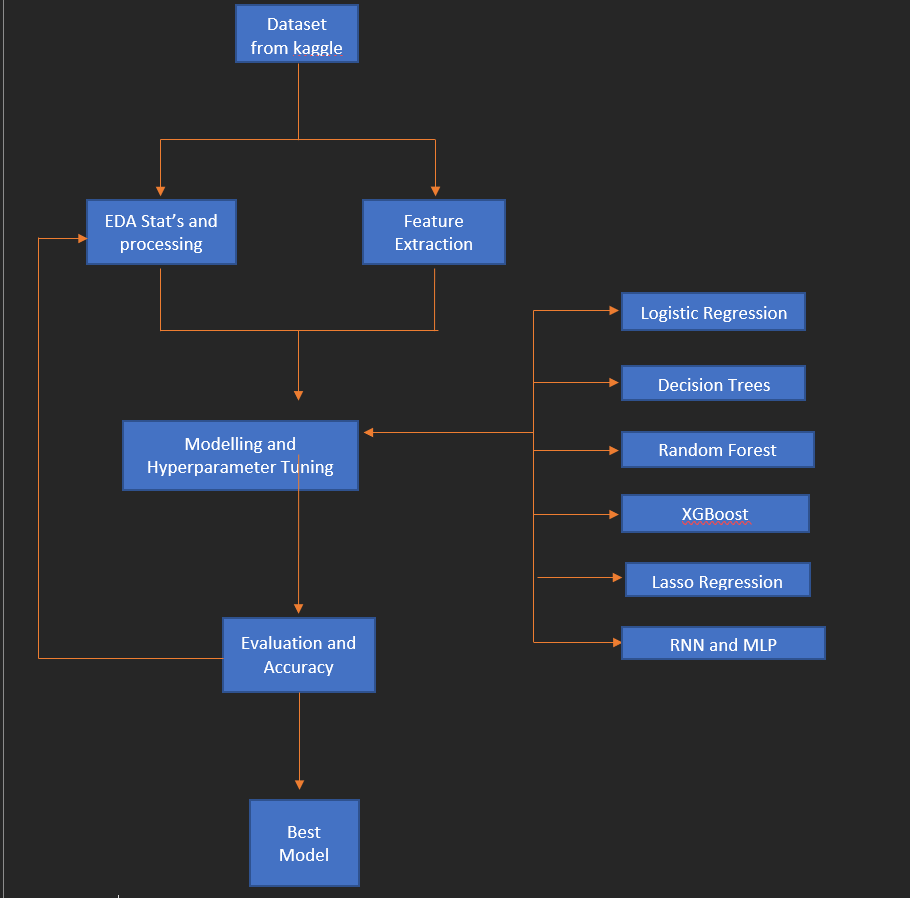

### Section 6.2 : Results and discussion of results

## Logistic Regression :

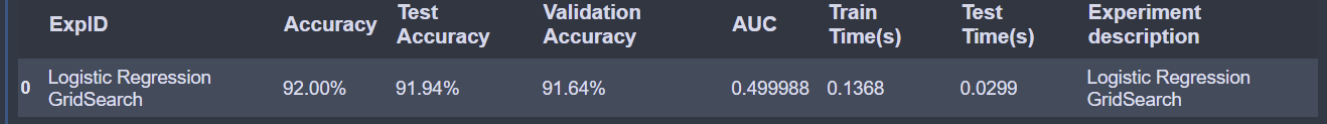

We implemented Logistic Regression with Hyperparameter Tuning in the above cell, as we can see, We got an accuracy of 92% which is an improvement from Phase - 1 where we got an accuracy of 91.9%. The AUC score didn't improve too much. The improvement in the accuracy isn't very considerable, but it's still an improvement





## Random Forest : 

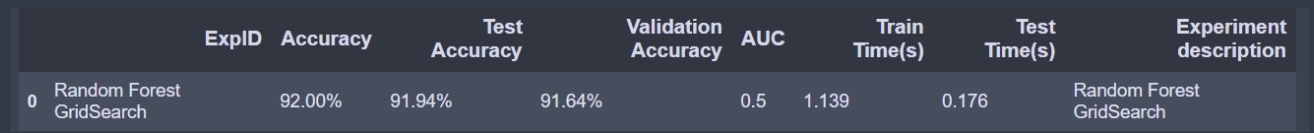

We implemented Random Forest with GridSearchCV in the above cell, as we can see, We got an accuracy of 92%. The AUC score didn't improve too much for Random Forest as well. We haven't tested Random Forest with just the baseline model hence we can't comment on how well the model performed better with hyperparameter tuning.





## Decision Trees : 

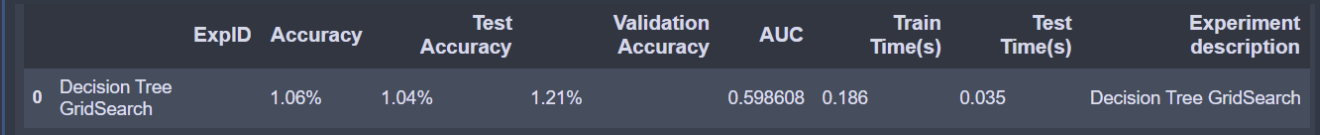

We implemented Decision Trees with Hyperparameter Tuning in the above cell, as we can see, We got a very poor accuracy but a decent AUC score of 0.6. Hence, we can conclude that Decision Trees doesn't work well with the dataset.




## XGBoost :

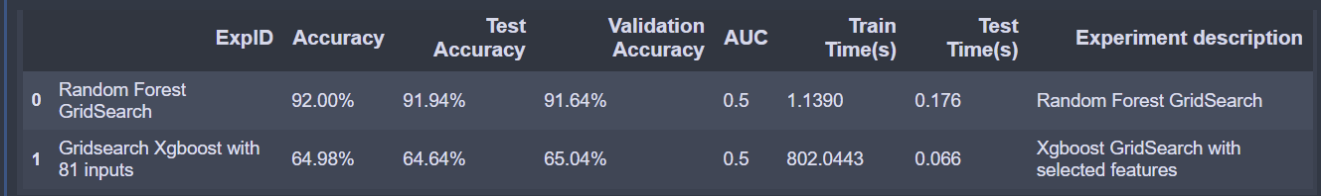

We tried using an ensemble method, XGBoost, with GridSearchCV to check how it's performing on our dataset. We got an accuracy of 64.98% with an AUC score of 0.5. Hence we can see that it's performance on our dataset isn't too great compared to Logistic Regression and Random Forest.




## Lasso Regression :

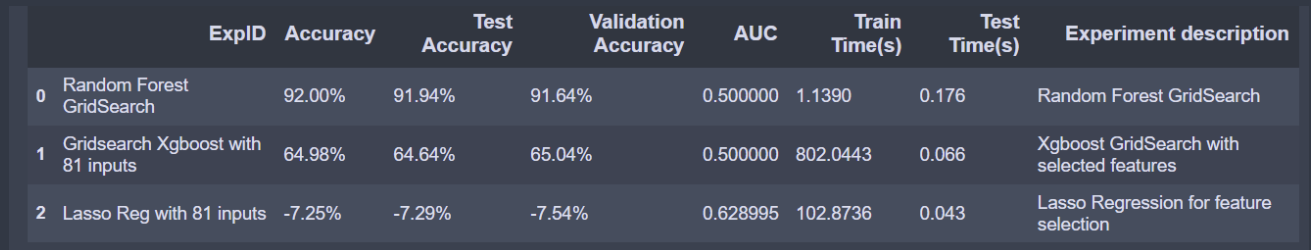

Finally, we tried Lasso Regression using GridSearch and the model performed extremely poor, but with a decent AUC score. However, there's no point of a good AUC score with an extremely poor.


## Section 7 : Conclusion and Future Work

Many people struggle to get loans due to insufficient or non-existent credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders. Home credit strives to broaden financial intrusion for the unbanked population by providing a positive and safe borrowing experience.  In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 

In phase 2, we experimented multiple models including both classification and regression models. We performed Feature Engineering and Hyperparameter Tuning. We replaced missing values with 0,mean and mode post which we added some features which we thought were relevant to the dataset and those datasets which made sense. As a part of feature engineering, we also removed the features which are highly correlated. We performed Hyperparameter Tuning utilizing GridSearchCV. We trained multiple models like Logistic Regression, Decision Tree, Random Forest, Lasso Regression and XGBoost. By comparing the results of these models, we observed that Logistic Regression and Random Forest performed the best giving us an accuracy of 92% and Lasso Regression gave us the least accuracy. 

In phase 3, we will implement a deep learning models ,Multilayer perceptron and Recurrent Neural Networks and other models in PyTorch. We are unable to increase the AUC and accuracy at the same time currently, hence, we aim to achieve this using Neural Networks.

## Section 8 : Kaggle Submission

In [55]:
output_data = application_test[['SK_ID_CURR']]
output_data['TARGET'] = pd.Series(combined_pl_with_pred.predict(application_test).tolist())
output_data['TARGET'].value_counts()
output_data.to_csv('./output_submission_1.csv', index=False)

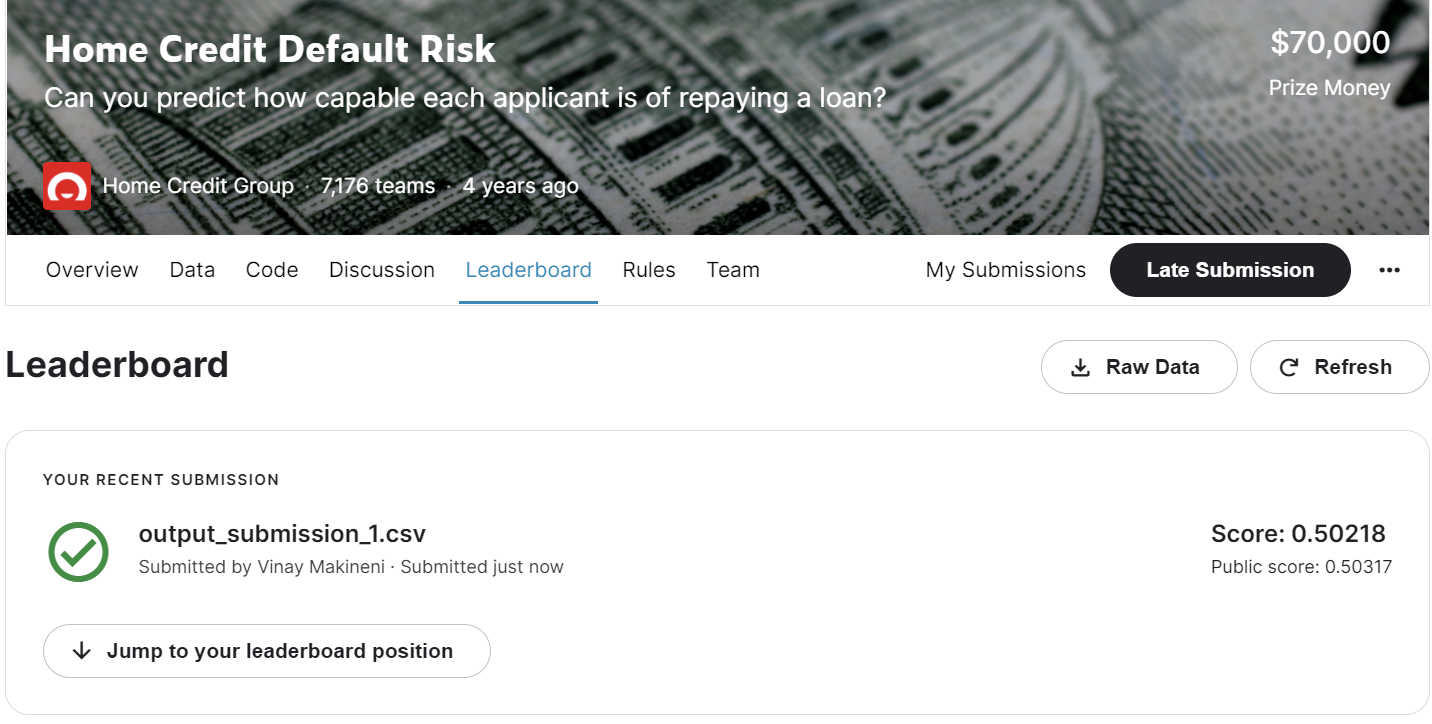